### The Acetone synthesis

1. Cumene hydroperoxide decomposition\
`CC(C)(OO)c1ccccc1>acid>CC(C)=O`
2. Isopropanol dehydrogenation\
`CC(C)O>Cu>CC(C)=O`
3. Propene hydration/oxidation\
`{2}C=CC.O=O>Pd/Cu>{2}CC(C)=O`

In [6]:
from rxnSMILES4AtomEco import atom_economy

# calculate Verbose mode
atom_economy("{2}C=CC.O=O>Pd/Cu>{2}CC(C)=O")


 Atom Economy Calculation: 

--------------------------------------------------
                     REACTANTS                    
..................................................
 SMILES:             C=CC
 Molecular Formula:  C3H6
 Molecular Weight:   42.08 g/mol
 Coefficient:        2.0
..................................................
 SMILES:             O=O
 Molecular Formula:  O2
 Molecular Weight:   32.00 g/mol
 Coefficient:        1.0
--------------------------------------------------
--------------------------------------------------
                     PRODUCTS                     
..................................................
 SMILES:             CC(C)=O
 Molecular Formula:  C3H6O
 Molecular Weight:   58.08 g/mol
 Coefficient:        2.0
--------------------------------------------------

 Atom Economy:       100.0%                         



In [7]:
reactions_smiles_pathway = {
    # Cumene hydroperoxide decomposition
    "CC(C)(OO)c1ccccc1>acid>CC(C)=O": "Cumene",
    # Isopropanol dehydrogenation
    "CC(C)O>Cu>CC(C)=O": "Isopropanol",
    # Propene oxidation
    "{2}C=CC.O=O>Pd/Cu>{2}CC(C)=O": "Propene"
}

In [8]:
from rxnSMILES4AtomEco import get_atom_economy

# Store results
results_paths = {}

# Loop through pathways and calculate atom economy
for smiles, name in reactions_smiles_pathway.items():
    results_paths[name] = get_atom_economy(smiles)

# Print results
for pathway, value in results_paths.items():
    print(f"{value:.1f}% {pathway}")

38.2% Cumene
96.6% Isopropanol
100.0% Propene


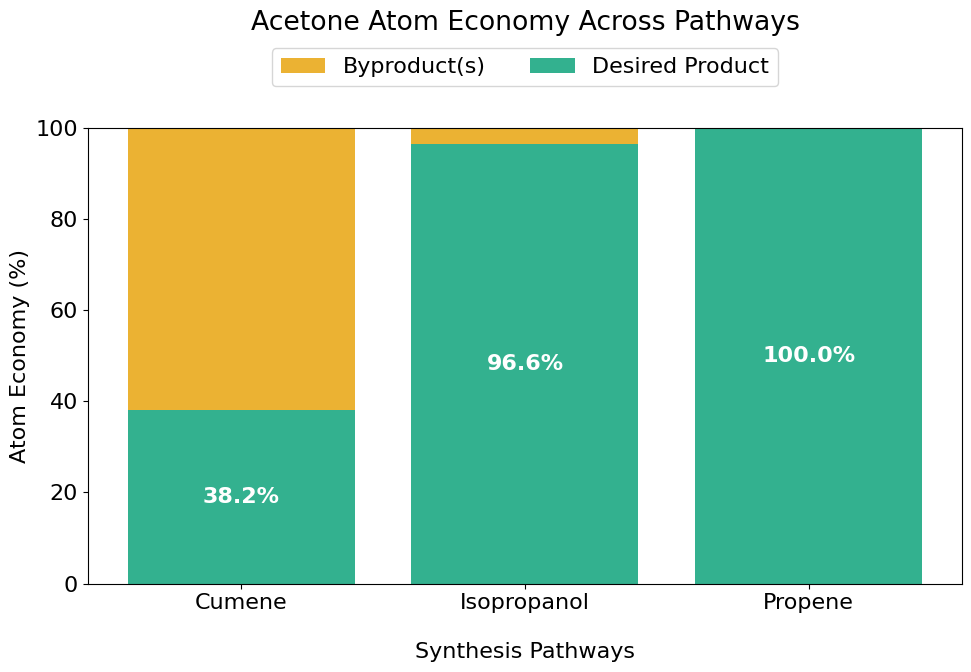

In [9]:
import matplotlib.pyplot as plt

# Extract labels (pathway names) and values (atom economy)
pathways = list(results_paths.keys())  # Labels for x-axis
atom_economy_values = list(results_paths.values())  # Y-axis values

# Calculate byproducts as (100 - atom economy)
byproduct_values = [100 - value for value in atom_economy_values]

# Create a single plot
fig, ax = plt.subplots(figsize=(10, 7))  # Single axis for both plots
plt.rcParams.update({'font.size': 16})

# Plot bars: green for desired product, orange for byproducts
bars = ax.bar(pathways, atom_economy_values, color='#009E73', \
              label="Desired Product", alpha=0.8)
ax.bar(pathways, byproduct_values, bottom=atom_economy_values, \
       color='#E69F00', label="Byproduct(s)", alpha=0.8)

# Annotate bars with atom economy percentages
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height/2, f'{height:.1f}%', 
            ha='center', va='center', color='white', fontweight='bold')

# Titles & labels
ax.set_title("Acetone Atom Economy Across Pathways\n\n\n")
ax.set_xlabel("\nSynthesis Pathways")
ax.set_ylabel("Atom Economy (%)")
ax.set_ylim(0, 100)  # Limit y-axis to 100%

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2,reverse=True)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

# Save the plot, uncomment if used
#save_path = '/tmp/acetone_histogram.png'  # Writable on many systems
#plt.draw()  # Force render
#print(f"Saving to: {save_path}")
#plt.savefig(save_path, dpi=300, bbox_inches='tight')
#plt.close()
#print("Save completed (check directory).")

In [10]:
# Ask user for confirmation
run_script = input("\n(▀̿Ĺ̯▀̿ ̿) Do you want to execute the reaction processing? \
                   [Y/n]:\n\n").strip().lower()

# Only proceed if the user agrees
if run_script in ["", "y", "yes"]:  # Default to "yes" if empty input
    from rdkit import Chem
    from rdkit.Chem import Draw
    from rdkit.Chem import rdChemReactions
    from PIL import Image
    import re
    import os

    # Output folder
    #output_dir = "/tmp/reactions"  # Change as needed
    output_dir = ""  # Change as needed
    
    # Function to clean and expand reaction SMILES
    def process_smiles(smiles):
        # Remove reagents/catalysts (text between ">...>")
        cleaned_smiles = re.sub(r'>[^>]+>', '>>', smiles)
    
        # Expand {n} notation: "{2}C=CC" → "C=CC.C=CC"
        def expand_match(match):
            n = int(match.group(1))  # Extract number
            molecule = match.group(2)  # Extract SMILES
            # If stoichiometric coefficient found, repeat SMILES n times 
            # (works only with integer coefficients!)
            return ".".join([molecule] * n)  
    
        expanded_smiles = re.sub(r'\{(\d+)\}([A-Za-z0-9@+\-=#()\[\]]+)', \
                                 expand_match, cleaned_smiles)
        
        return expanded_smiles
    
    # Loop through each reaction and plot separately
    for reaction_smiles, name in reactions_smiles_pathway.items():
        cleaned_smiles = process_smiles(reaction_smiles)  # Process SMILES
        print(f"Processing: {name}, SMILES: {cleaned_smiles}")
    
        try:
            # Convert to RDKit reaction object
            reaction = rdChemReactions.ReactionFromSmarts(cleaned_smiles, \
                                                          useSmiles=True)
    
            # Generate reaction image
            img = Draw.ReactionToImage(reaction, subImgSize=(300, 300))
    
            # Save path
            save_path = os.path.join(output_dir, f"{name}.png")
            img.save(save_path, format="PNG", dpi=(300, 300))
    
            print(f"Saved: {save_path}")
    
        except Exception as e:
            print(f"Error processing {name}: {e}")

else:
    print("Script execution skipped.")

Processing: Cumene, SMILES: CC(C)(OO)c1ccccc1>>CC(C)=O
Saved: Cumene.png
Processing: Isopropanol, SMILES: CC(C)O>>CC(C)=O
Saved: Isopropanol.png
Processing: Propene, SMILES: C=CC.C=CC.O=O>>CC(C)=O.CC(C)=O
Saved: Propene.png
